<a href="https://colab.research.google.com/github/allenimmnauel018/Tree-Species-Classification/blob/main/Tree_Species_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import os

repo_path = "/content/drive/MyDrive/Tree_Species_Dataset"
class_dirs = sorted(os.listdir(repo_path))
print(f"Number of classes: {len(class_dirs)}")

Number of classes: 30


In [38]:
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")

Number of classes: 30


In [39]:
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 1454


In [40]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)

           Image Count
other              125
bamboo              50
neem                50
sugarcane           50
gunda               49
shape:  (30, 1)


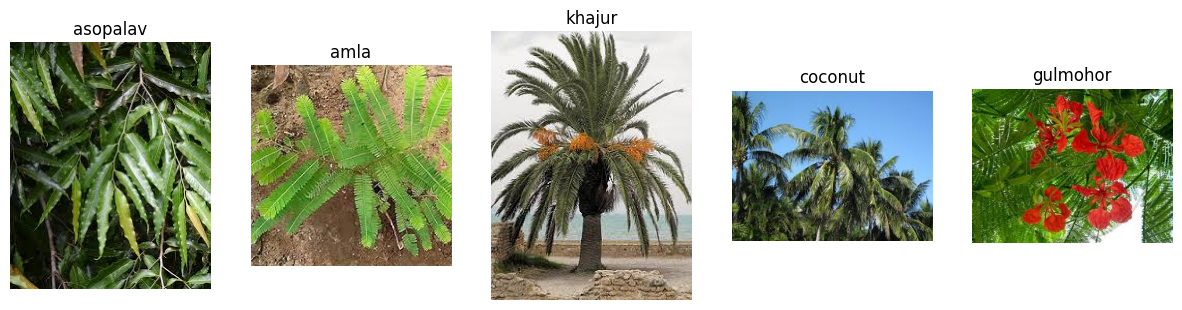

In [41]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_path = os.path.join(repo_path, class_dir, os.listdir(os.path.join(repo_path, class_dir))[0])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(repo_path, class_dirs)

In [42]:
image_shapes = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        img = Image.open(img_path)
        image_shapes.append(img.size)

# DataFrame and Summary
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()

,Width,Height
0,202,249
1,194,259
2,259,194
3,186,271
4,267,189


In [43]:
print(shapes_df.describe())

             Width       Height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [44]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 0


In [45]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 0


In [46]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [47]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"Removed {removed_count} duplicate images.")

Removed 0 duplicate images.


In [48]:
# Re-check to confirm duplicates removed
hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicates remaining:", len(duplicates))

Duplicates remaining: 0


In [49]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 0
🔺 Very large images: 0


In [50]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

In [51]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"Removed {removed_count} outlier images (small + large).")

Removed 0 outlier images (small + large).


In [52]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


In [54]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,409 (16.09 MB)

 Trainable params: 167,838 (655.62 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [55]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.0457 - loss: 3.4476 - val_accuracy: 0.0903 - val_loss: 3.3760
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 587ms/step - accuracy: 0.0836 - loss: 3.3949 - val_accuracy: 0.0903 - val_loss: 3.3785
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 552ms/step - accuracy: 0.0863 - loss: 3.3884 - val_accuracy: 0.0903 - val_loss: 3.3868
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 585ms/step - accuracy: 0.0755 - loss: 3.4027 - val_accuracy: 0.0903 - val_loss: 3.3780
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 618ms/step - accuracy: 0.0785 - loss: 3.3883 - val_accuracy: 0.0903 - val_loss: 3.3761
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 583ms/step - accuracy: 0.0898 - loss: 3.3794 - val_accuracy: 0.0903 - val_loss: 3.3761
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 589ms/step - accuracy: 0.0789 - loss: 3.3909 - val_accuracy: 0.0903 - val_loss: 3.3701
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 614ms/step - accuracy: 0.0938 - loss: 3.3746 - val_accurac

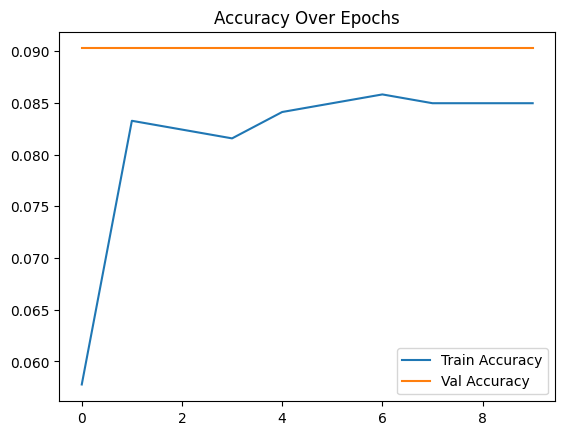

In [56]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.keras")

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.keras')
print("Basic CNN model saved as 'basic_cnn_tree_species.keras'")


Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.
Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 636ms/step - accuracy: 0.0626 - loss: 3.7614 - val_accuracy: 0.0903 - val_loss: 3.3150
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 613ms/step - accuracy: 0.0928 - loss: 3.2881 - val_accuracy: 0.1227 - val_loss: 3.1100
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 556ms/step - accuracy: 0.1223 - loss: 3.1562 - val_accuracy: 0.1588 - val_loss: 2.9478
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 577ms/step - accuracy: 0.1670 - loss: 2.9292 - val_accuracy: 0.1661 - val_loss: 2.9088
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 589ms/step - accuracy: 0.1629 - loss: 3.0043 - val_accuracy: 0.2058 - val_loss: 2.7617
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 553ms/step - accuracy: 0.1901 - loss: 2.8035 - val_accuracy: 0.2383 - val_loss: 2.7386
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 583ms/step - accuracy: 0.2003 - loss: 2.7594 - val_accuracy: 0.2491 - val_loss: 2.6662
Epoch 8/10
3

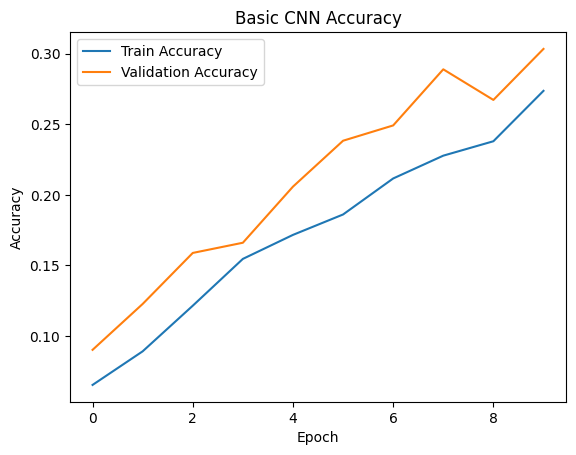

In [59]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

num_classes = train_generator.num_classes

model = Sequential([
    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Classification Head
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train with early stopping and checkpoint
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)
    ]
)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 847ms/step - accuracy: 0.0488 - loss: 3.7469 - val_accuracy: 0.0325 - val_loss: 3.4072
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 586ms/step - accuracy: 0.1143 - loss: 3.2263 - val_accuracy: 0.0289 - val_loss: 3.4250
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 615ms/step - accuracy: 0.1528 - loss: 3.0622 - val_accuracy: 0.0217 - val_loss: 3.4394
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 640ms/step - accuracy: 0.1781 - loss: 2.9276 - val_accuracy: 0.0325 - val_loss: 3.4820
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 586ms/step - accuracy: 0.1903 - loss: 2.8903 - val_accuracy: 0.0361 - val_loss: 3.6004
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 606ms/step - accuracy: 0.2042 - loss: 2.8489 - val_accuracy: 0.0433 - val_loss: 3.6802
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 614ms/step - accuracy: 0.2341 - loss: 2.7385 - val_accuracy: 0.0361 - val_loss: 3.7230
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 577ms/step - accuracy: 0.2386 - loss: 2.7032 - val_accu

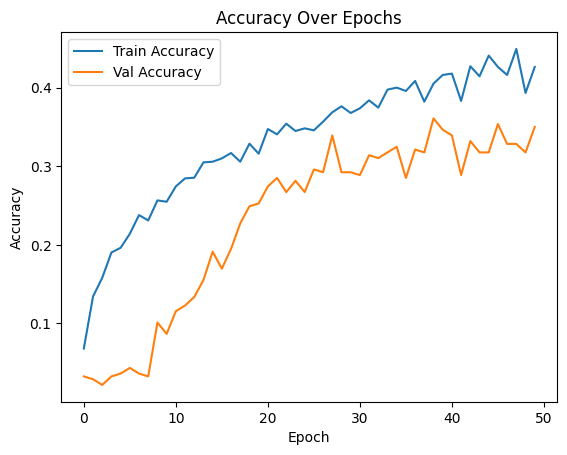

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step


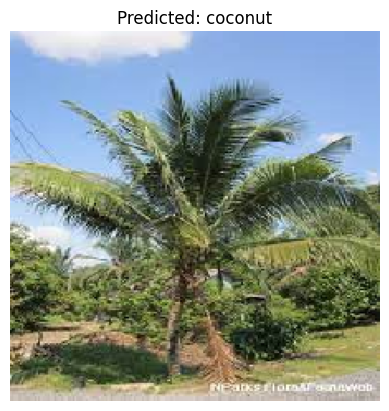

In [73]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load best model
model = tf.keras.models.load_model("best_model.keras")

# Class labels
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

# Prediction image
img_path = "/content/drive/MyDrive/Tree_Species_Dataset/coconut/images (2).jpg"  # <-- Update path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]

# Show result
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


In [75]:
!pip install -q tflite-support

In [76]:
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

In [77]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpy3zbabis'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_10')
Output Type:
  TensorSpec(shape=(None, 30), dtype=tf.float32, name=None)
Captures:
  135737364522832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135737364524560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135737364522256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135737364522640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135737364528592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135737364524368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135737364515536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135737364517648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135737364514768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135737364517456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13573736452

In [79]:
with open("labels.txt", "w") as f:
    for label in class_names:
        f.write(label + "\n")

In [80]:
writer = image_classifier.MetadataWriter.create_for_inference(
    model_buffer=tflite_model,
    input_norm_mean=[127.5],
    input_norm_std=[127.5],
    label_file_paths=["labels.txt"]
)

In [81]:
metadata_buf = writer.populate()
writer_utils.save_file(metadata_buf, "model_with_metadata.tflite")

In [82]:
print("✅ TFLite model with metadata saved as 'model_with_metadata.tflite'")

✅ TFLite model with metadata saved as 'model_with_metadata.tflite'
